<a href="https://colab.research.google.com/github/ddzik/Data_Analytics_Portofolio/blob/main/%5BW6W7W8_JAN23%5D_Devy_Dzikyan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) Business Background

## Business Requirement and Objective

XYZ company is an Indonesian investment startup which makes an application that can buy and sell mutual funds. The mutual funds consists of: stock mutual funds, bond mutual funds, money market mutual funds, and mixed-investment mutual funds. The types reflect the underlying investment made by the Fund Manager for the mutual fund.

The dataset contains information about user-level mutual fund balance, available daily, and user information.

Our objective is to analyze this data in order to create a segmentation based on user preference. By understanding the user segmentation, we can create more effective thematic campaigns which targeting users based on their preference.

### Dataset

**User Dataset**
*   https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0

**Transaction Dataset**
*   https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0





# B) Data Preparation

## Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

### Users (spreadsheet)

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv 

print(sheet_url_replace) #To show the link to csv

df_users_og = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_users_og.head() #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
df_users_og.tail()  # display the bottom 5 data
df_users_og.sample(5) # display random rows
df_users_og.iloc[:7] # display certain rows

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji,999000,149000,0
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,0,0,0


### Transactions (spreadsheet)

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv 

print(sheet_url_replace) #To show the link to csv

df_transactions_og = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_transactions_og.head() #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


### Data Dictionary

1. Users Dataseet
  * user_id = Client ID on the platform
  * registration_import_datetime = Registration time and date at UTC+7 timezone (WIB)
  * user_gender	= User self-identified gender
  * user_age =	User self-identified age
  * user_occupation =	User self-identified job
  * user_income_range =	User self-identified income range
  * referral_code_used =	If user enter referral code during registration, the value is "used referral"; else will be Null valued
  * user_income_source =	User self-declared source of income
  * end_of_month_invested_amount =	End of month total amount of mutual fund that are still invested in the platform
  * total_buy_amount =	Total buying amount of mutual funds
  * total_sell_amount =	Total selling amount of mutual funds

2. Transaction Dataset
  * user_id	Client = ID on the platform
  * date	= Date of the transaction
  * buy_saham_transaction_amount	= Amount of Saham mutual fund that are bought by user at that date
  * sell_saham_transaction_amount	= Amount of Saham mutual fund that are sell by user at that date
  * buy_pasar_uang_transaction_amount	= Amount of Pasar Uang  mutual fund that are bought by user at that date
  * sell_pasar_uang_transaction_amount	= Amount of Pasar Uang mutual fund that are sell by user at that date
  * buy_pendapatan_tetap_transaction_amount	= Amount of Pendapatan Tetap mutual fund that are bought by user at that date
  * sell_pendapatan_tetap_transaction_amount	= Amount of Pendapatan Tetap mutual fund that are sell by user at that date
  * buy_campuran_transaction_amount	= Amount of Campuran mutual fund that are bought by user at that date
  * sell_campuran_transaction_amount	= Amount of Campuran mutual fund that are sell by user at that date
  * total_buy_transaction_amount	= Total mutual fund that are bought by user at that date
  * total_sell_transaction_amount =	Total mutual fund that are sell by user at that date
  * saham_invested_amount	= Amount of Saham mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
  * pasar_uang_invested_amount	= Amount of Pasar Uang mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
  * pendapatan_tetap_invested_amount	= Amount of Pendapatan Tetap mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
  * campuran_invested_amount	= Amount of Campuran mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
  * total_invested_amount	= Total amount of mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)

# C) Data Cleaning

## Users

In [ ]:
#Make a copy of the original data for data cleaning
df_users_dc = df_users_og.copy()

In [ ]:
df_users_dc.head() #Showing 5 data records

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


### Check Data Type

In [ ]:
df_users_dc.shape #Check how much column and rows
print('Number of rows is: ', df_users_dc.shape[0])
print('Number of columns is: ', df_users_dc.shape[1])

Number of rows is:  14712
Number of columns is:  11


In [ ]:
df_users_dc.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df_users_dc.isnull().sum() #Check how much null values exist

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

In [ ]:
# percentage of missing values in each column

round(df_users_dc.isnull().sum() * 100 / len(df_users_dc),2)

user_id                          0.00
registration_import_datetime     0.00
user_gender                      0.00
user_age                         0.00
user_occupation                  0.00
user_income_range                0.00
referral_code_used              61.91
user_income_source               0.00
end_of_month_invested_amount     0.00
total_buy_amount                 0.00
total_sell_amount                0.00
dtype: float64

In [ ]:
# percentage of rows with missing values

round(df_users_dc.isnull().any(axis=1).sum() * 100 / len(df_users_dc),2)

61.91

Insight :
* user_id can be changed into string (For data type convertion demo purposes)
* registration_import_datetime should be changed into time series.
* referral_code_used, 9108 row null

In [ ]:
df_users_dc['user_id'] = df_users_dc['user_id'].astype(str)   #Change user_id data type into string

In [ ]:
df_users_dc.dtypes #Check the datatype of user_id after replaced

user_id                         object
registration_import_datetime    object
user_gender                     object
user_age                         int64
user_occupation                 object
user_income_range               object
referral_code_used              object
user_income_source              object
end_of_month_invested_amount     int64
total_buy_amount                 int64
total_sell_amount                int64
dtype: object

In [ ]:
df_users_dc['registration_import_datetime'] = pd.to_datetime(df_users_dc['registration_import_datetime'])

In [ ]:
df_users_dc.dtypes #Check the datatype of registration_import_datetime after replaced

user_id                                 object
registration_import_datetime    datetime64[ns]
user_gender                             object
user_age                                 int64
user_occupation                         object
user_income_range                       object
referral_code_used                      object
user_income_source                      object
end_of_month_invested_amount             int64
total_buy_amount                         int64
total_sell_amount                        int64
dtype: object

### Check for Values and Typo

In [ ]:
df_users_dc.columns
df_users_dc.columns.to_list()

['user_id',
 'registration_import_datetime',
 'user_gender',
 'user_age',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'end_of_month_invested_amount',
 'total_buy_amount',
 'total_sell_amount']

In [ ]:
#Checking the values for registration_import_datetime
df_users_dc[df_users_dc.columns[1]].value_counts()

2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
2021-08-10 10:55:26    5
2021-09-17 14:10:39    5
2021-08-05 10:18:13    5
                      ..
2021-10-02 16:54:43    1
2021-09-28 10:16:08    1
2021-10-02 16:25:15    1
2021-10-17 02:57:16    1
2021-10-22 00:55:26    1
Name: registration_import_datetime, Length: 11536, dtype: int64

In [ ]:
#Checking the values for user_gender
df_users_dc[df_users_dc.columns[2]].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

Recommendation :
Leave it as it is because there is no typos and only consists of 2 categories.

In [ ]:
#Checking the values for user_age
df_users_dc[df_users_dc.columns[3]].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

Recommendation : Can be made into range.

In [ ]:
#Checking the values for user_occupation
df_users_dc[df_users_dc.columns[4]].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

Recommendation :
Leave it as it is because there is no typos and consists of 10 categories which is not that  much.

In [ ]:
#Checking the values for user_income_range
df_users_dc[df_users_dc.columns[5]].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

Recommendation :
Leave it as it is because there is no records that stands out alone.

In [ ]:
#Checking the values for referral_code_used
df_users_dc[df_users_dc.columns[6]].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

Option: We can change the null value as there is only 1 kind value aside from null which is "used referral".

In [ ]:
#Checking the values for user_income_source
df_users_dc[df_users_dc.columns[7]].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Recommendation :
Leave it as it is because there is no typos and consists of 10 categories which is not that  much.

### Treat Missing & Irrevelant Values

In [ ]:
df_users_dc.columns.to_list()

['user_id',
 'registration_import_datetime',
 'user_gender',
 'user_age',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'end_of_month_invested_amount',
 'total_buy_amount',
 'total_sell_amount']

In [ ]:
#Confirm whether null data still exist
df_users_dc.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

In [ ]:
df_users_dc['referral_code_used'].fillna("no referral",inplace = True)

#Then we confirm the data after fill the null values
df_users_dc.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

In [ ]:
#Checking the values for referral_code_used
df_users_dc[df_users_dc.columns[6]].value_counts()

no referral      9108
used referral    5604
Name: referral_code_used, dtype: int64

### Data Manipulation

Creating a bin for user_age

In [ ]:
#Make a copy of the original data for data manipulation
df_users_dm = df_users_dc.copy()

In [ ]:
df_users_dm['user_age'].value_counts()    #Check the unique values and the counts

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

In [ ]:
a = df_users_dm['user_age']   #To make it easier to assign the data into the bin / category we assign the column into a variable

In [ ]:
#Here we also decided to assign it into different column
#loc[row,column]
df_users_dm.loc[(a < 18), 'user_age_rg']  = 'Under 18'
df_users_dm.loc[(a >= 18), 'user_age_rg']  = '18-24'
df_users_dm.loc[(a >= 25), 'user_age_rg']  = '25-34'
df_users_dm.loc[(a >= 35), 'user_age_rg']  = '35-44'
df_users_dm.loc[(a >= 45), 'user_age_rg']  = '45-54'
df_users_dm.loc[(a >= 55), 'user_age_rg']  = '55-64'
df_users_dm.loc[(a >= 65), 'user_age_rg']  = '65 and above'

In [ ]:
df_users_dm['user_age_rg'].value_counts()    #To confirm the data after we create the categories

18-24           6888
25-34           5123
35-44           1620
45-54            634
Under 18         268
55-64            158
65 and above      21
Name: user_age_rg, dtype: int64

In [ ]:
df_users_dm.shape

(14712, 12)

### Check Duplicates

In [ ]:
#Check the duplicate
df_users_dm[df_users_dm['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg


There are no duplicate user_id, so there are no records to be removed.

### Users Cleand Data

In [ ]:
df_users = df_users_dm.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,45-54
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,55-64
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,45-54
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54


In [ ]:
df_users.info()   #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  user_age_rg                 

## Transaction

In [ ]:
#Make a copy of the original data for data cleaning
df_transactions_dc = df_transactions_og.copy()

### Check Data Type

In [ ]:
df_transactions_dc.shape    #Check how much column and rows
print("Number of rows: ", df_transactions_dc.shape[0])
print("Number of columns: ", df_transactions_dc.shape[1])

Number of rows:  158811
Number of columns:  17


In [ ]:
df_transactions_dc.info()     #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [ ]:
df_transactions_dc.isnull().sum() #Check how much null values exist

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

Insight :
* user_id can be changed into string (For data type convertion demo purposes)
* date should be changed into time series.

In [ ]:
df_transactions_dc['user_id'] = df_transactions_dc['user_id'].astype(str)   #Change user_id data type into string

In [ ]:
#To convert the date into datetime data type

df_transactions_dc['date'] = pd.to_datetime(df_transactions_dc['date'])

In [ ]:
df_transactions_dc.dtypes #Check the datatype of after replaced

user_id                                             object
date                                        datetime64[ns]
buy_saham_transaction_amount                       float64
sell_saham_transaction_amount                      float64
buy_pasar_uang_transaction_amount                  float64
sell_pasar_uang_transaction_amount                 float64
buy_pendapatan_tetap_transaction_amount            float64
sell_pendapatan_tetap_transaction_amount           float64
buy_campuran_transaction_amount                    float64
sell_campuran_transaction_amount                   float64
total_buy_transaction_amount                         int64
total_sell_transaction_amount                        int64
saham_invested_amount                              float64
pasar_uang_invested_amount                         float64
pendapatan_tetap_invested_amount                   float64
campuran_invested_amount                           float64
total_invested_amount                                int

### Check for Values and Typo

In [ ]:
#Checking the values for total_invested_amount
df_transactions_dc[df_transactions_dc.columns[16]].value_counts()

0            32577
100000       25932
10000        11192
200000        9936
500000        6069
             ...  
74000000         1
578400000        1
76000000         1
1890000          1
30779            1
Name: total_invested_amount, Length: 2727, dtype: int64

In [ ]:
#Checking the max values for total_invested_amount
df_transactions_dc[df_transactions_dc.columns[16]].max()

1012200000

In [ ]:
#Checking the min values for total_invested_amount
df_transactions_dc[df_transactions_dc.columns[16]].min()

0

We can leave it as it is as it is not impossible to have a certain value. We need to check the outlier first before deciding whether there is typo.

### Treat Missing & Irrelevant Values

In [ ]:
df_transactions_dc.head() #Showing 5 data records

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


In [ ]:
df_transactions_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

It is possible to have missing values, which indicating there is no transaction.
However, NaN vallue will be converted to 0.

In [ ]:
df_transactions_dn = df_transactions_dc.copy()
df_transactions_dn.fillna(0,inplace = True)

df_transactions_dn.head() #Showing 5 data records

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000


In [ ]:
df_transactions_dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

### Check Duplicates

In [ ]:
#Make a copy of the original data for checking data duplicates
df_transactions_dd = df_transactions_dn.copy()

In [ ]:
df_transactions_dd['user_date'] = df_transactions_dd['user_id'] + ':' + df_transactions_dd['date'].astype(str)
df_transactions_dd.head() #Showing 5 data records

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,user_date
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,50701:2021-08-30
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,50701:2021-08-31
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,50701:2021-09-01
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,50701:2021-09-02
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,50701:2021-09-03


In [ ]:
#Check the duplicate
df_transactions_dd[df_transactions_dd['user_date'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,user_date


There are no duplicate user per date. So we can use the previous cleaned data (df_transactions_dn) as we did not make any changes in this step of dataset.

### Transactions Cleaned Data

In [ ]:
df_trans = df_transactions_dn.copy()  #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_trans.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000


In [ ]:
df_trans.info() #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

## Merge Data

In [ ]:
#Merge the table
#Since we want to analyze the user and the transaction, it is feels right to have both data available and none of them are null
#Thats why we use inner join
df_merged = df_users.merge(df_transactions, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier


In [ ]:
df_merged.info() #To summary the data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137008 entries, 0 to 137007
Data columns (total 29 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   137008 non-null  object        
 1   registration_import_datetime              137008 non-null  datetime64[ns]
 2   user_gender                               137008 non-null  object        
 3   user_age                                  137008 non-null  int64         
 4   user_occupation                           137008 non-null  object        
 5   user_income_range                         137008 non-null  object        
 6   referral_code_used                        137008 non-null  object        
 7   user_income_source                        137008 non-null  object        
 8   end_of_month_invested_amount              137008 non-null  int64         
 9   total_buy_amoun

## Checking Outlier in Total Invested Amount

<AxesSubplot:xlabel='total_invested_amount'>

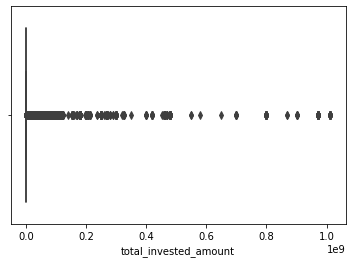

In [ ]:
#Cheking the data distribution of the df_merged data for total invested amount
sns.boxplot(data = df_trans , x ="total_invested_amount")

In [ ]:
#Check the Q1,Q3,IQR,UB & LB
#toinv = total invested amount
print('Outlier Detection "total_invested_amount":\n')
toinv_Q1 = df_trans["total_invested_amount"].quantile(0.25)
print("Q1 =",toinv_Q1)

toinv_Q3 = df_trans["total_invested_amount"].quantile(0.75)
print("Q3 =",toinv_Q3)

toinv_IQR = toinv_Q3 - toinv_Q1
print("IQR =",toinv_IQR)

toinv_LB = toinv_Q1-1.5*toinv_IQR
print("LB =",toinv_LB)

toinv_UB = toinv_Q3+1.5*toinv_IQR
print("UB =",toinv_UB)


Outlier Detection "total_invested_amount":

Q1 = 10000.0
Q3 = 500000.0
IQR = 490000.0
LB = -725000.0
UB = 1235000.0


In [ ]:
a = df_trans['total_invested_amount']   #To make it easier to assign the data into the bin / category we assign the column into a variable

#Here we also decided to assign it into different column
#loc[row,column]
df_trans.loc[(a < -725000), 'outlier']  = 'Outlier'
df_trans.loc[(a >= -725000), 'outlier']  = 'Not Outlier'
df_trans.loc[(a > 1235000), 'outlier']  = 'Outlier'
df_trans

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,Outlier
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,Outlier
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,Outlier
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,Outlier
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000,Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,Not Outlier
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,10000.0,0.0,0.0,10000,Not Outlier
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,40000.0,10000.0,50000.0,0.0,100000,Not Outlier
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,10000.0,0.0,10000,Not Outlier


In [ ]:
df_transactions = df_trans[~(df_trans["outlier"] =="Outlier")]
df_transactions

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
24,50961,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,700000.0,100000.0,200000.0,0.0,1000000,Not Outlier
47,53759,2021-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,70000.0,10000.0,20000.0,0.0,100000,Not Outlier
48,53759,2021-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,70000.0,10000.0,20000.0,0.0,100000,Not Outlier
49,53759,2021-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,70000.0,10000.0,20000.0,0.0,100000,Not Outlier
50,53759,2021-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,70000.0,10000.0,20000.0,0.0,100000,Not Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,Not Outlier
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,10000.0,0.0,0.0,10000,Not Outlier
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,40000.0,10000.0,50000.0,0.0,100000,Not Outlier
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,10000.0,0.0,10000,Not Outlier


<AxesSubplot:xlabel='total_invested_amount'>

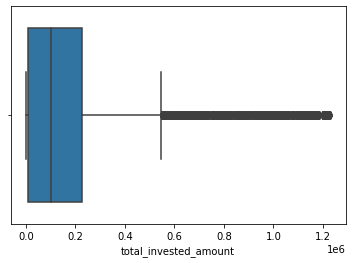

In [ ]:
#Cheking the data distribution of the df_merged data for total invested amount
sns.boxplot(data = df_merged , x ="total_invested_amount")

In [ ]:
#Check the Q1,Q3,IQR,UB & LB
#toinv = total invested amount
print('Outlier Detection "total_invested_amount":\n')
toinv_Q1 = df_merged["total_invested_amount"].quantile(0.25)
print("Q1 =",toinv_Q1)

toinv_Q3 = df_merged["total_invested_amount"].quantile(0.75)
print("Q3 =",toinv_Q3)

toinv_IQR = toinv_Q3 - toinv_Q1
print("IQR =",toinv_IQR)

toinv_LB = toinv_Q1-1.5*toinv_IQR
print("LB =",toinv_LB)

toinv_UB = toinv_Q3+1.5*toinv_IQR
print("UB =",toinv_UB)


Outlier Detection "total_invested_amount":

Q1 = 10000.0
Q3 = 225000.0
IQR = 215000.0
LB = -312500.0
UB = 547500.0


In [ ]:
a = df_merged['total_invested_amount']   #To make it easier to assign the data into the bin / category we assign the column into a variable

#Here we also decided to assign it into different column
#loc[row,column]
df_merged.loc[(a < -725000), 'outlier']  = 'Outlier'
df_merged.loc[(a >= -725000), 'outlier']  = 'Not Outlier'
df_merged.loc[(a > 1235000), 'outlier']  = 'Outlier'
df_merged

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137003,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,0.0,0.0,100000,Not Outlier
137004,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier
137005,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier
137006,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier


In [ ]:
df_merged_clean = df_merged[~(df_merged["outlier"] =="Outlier")]
df_merged_clean

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137003,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,0.0,0.0,100000,Not Outlier
137004,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier
137005,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier
137006,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,45-54,2021-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,100000.0,1000000.0,0.0,1100000,Not Outlier


# D) EDA

In [ ]:
df_clean = df_merged_clean.copy()

#Preparing a copy of df_clean for EDA
df_eda_users = df_users.copy()
df_eda_transactions = df_transactions.copy()

df_eda = df_clean.copy()
df_eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_age_rg,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,outlier
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,190000.0,40000.0,270000.0,0.0,500000,Not Outlier


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137008 entries, 0 to 137007
Data columns (total 29 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   137008 non-null  object        
 1   registration_import_datetime              137008 non-null  datetime64[ns]
 2   user_gender                               137008 non-null  object        
 3   user_age                                  137008 non-null  int64         
 4   user_occupation                           137008 non-null  object        
 5   user_income_range                         137008 non-null  object        
 6   referral_code_used                        137008 non-null  object        
 7   user_income_source                        137008 non-null  object        
 8   end_of_month_invested_amount              137008 non-null  int64         
 9   total_buy_amoun

## Descriptive Statistic

*   How many users do we have in the data?
*   How is the demographic in the data?
*   How many users buy products in each mutual fund?



###Descriptive information about numeric variable

In [ ]:
numerical = df_eda_users.select_dtypes(include = ['number'])
numeric = numerical.columns.to_list()

desc_eda_users = df_eda_users[numeric].describe()
desc_eda_users.loc['kurtosis'] = df_eda_users[numeric].kurt() #show kurtosis statistic
desc_eda_users.loc['skewness'] = df_eda_users[numeric].skew() #show Skewness statistic
desc_eda_users.loc['variance'] = df_eda_users[numeric].var() #show variance statistic
desc_eda_users

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount
count,14712.000000,1.471200e+04,1.471200e+04,1.471200e+04
mean,27.176591,1.445996e+06,8.427521e+05,-1.648629e+05
std,8.552585,1.907388e+07,1.289743e+07,2.716129e+06
min,17.000000,0.000000e+00,0.000000e+00,-1.850000e+08
25%,21.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,25.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,31.000000,1.250000e+05,0.000000e+00,0.000000e+00
max,83.000000,1.012200e+09,7.995000e+08,0.000000e+00
kurtosis,2.554693,1.641541e+03,2.145983e+03,2.345219e+03
skewness,1.520584,3.676657e+01,4.114822e+01,-4.395519e+01


Insight:

*   Average user age is 27.177 years old, the median is 25 years old, the minimum is 17 years old, and the maximum is 83 years old.
*   Average end of month invested amount on user level are IDR 1.445.996,228, while the median for end of month invested amount on user level are IDR 0, with the maximum and minimum are IDR 1.012.200.000 and IDR 0.
*   The median for total buy amount on user level are 
IDR 0, the maximum are 799.500.000, while the minimum are IDR 0. Total buy amount on user level are IDR 842.752,135 on average.
*   The median for total sell amount on user level are IDR 0, while the minimum are IDR -185.000.000 and the maximum are 0. On average, the total sell amount on user level are IDR -164.862,886.
*   All features has skewness level below 1, indicating that the distribution is fairly symmetrical.

In [ ]:
numerical = df_eda_transactions.select_dtypes(include = ['number'])
numeric = numerical.columns.to_list()

desc_eda_transactions = df_eda_transactions[numeric].describe()
desc_eda_transactions.loc['kurtosis'] = df_eda_transactions[numeric].kurt() #show kurtosis statistic
desc_eda_transactions.loc['skewness'] = df_eda_transactions[numeric].skew() #show Skewness statistic
desc_eda_transactions.loc['variance'] = df_eda_transactions[numeric].var() #show variance statistic
desc_eda_transactions

,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05
mean,1.701335e+03,-2.270223e+03,1.752045e+03,-2.861196e+03,1.560655e+03,-3.652035e+03,1.823981e+01,-7.907959e+02,5.032275e+03,-9.574249e+03,6.740838e+04,5.817303e+04,6.754994e+04,5.650758e+03,1.987821e+05
std,2.000810e+04,5.938134e+04,2.250319e+04,1.238864e+05,1.819466e+04,3.506333e+05,2.092086e+03,1.432594e+05,4.109037e+04,4.149139e+05,1.301306e+05,1.371046e+05,1.306230e+05,7.016034e+04,2.769607e+05
min,0.000000e+00,-1.000000e+07,0.000000e+00,-3.000000e+07,0.000000e+00,-9.271240e+07,0.000000e+00,-5.000000e+07,0.000000e+00,-9.550092e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,1.000000e+04,1.000000e+04,0.000000e+00,1.000000e+05
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+04,5.000000e+04,7.000000e+04,0.000000e+00,2.250000e+05
max,1.030000e+06,0.000000e+00,1.215000e+06,0.000000e+00,1.000000e+06,0.000000e+00,5.000000e+05,0.000000e+00,1.215000e+06,0.000000e+00,1.199077e+06,1.215000e+06,1.204995e+06,1.150000e+06,1.230000e+06
kurtosis,5.759893e+02,1.014231e+04,7.943257e+02,2.842337e+04,7.312760e+02,5.592596e+04,3.127832e+04,1.086769e+05,2.316850e+02,3.261496e+04,1.416018e+01,2.357356e+01,1.514620e+01,1.880495e+02,2.901908e+00
skewness,2.026940e+01,-8.306497e+01,2.444666e+01,-1.413101e+02,2.245117e+01,-2.280454e+02,1.609391e+02,-3.163369e+02,1.340590e+01,-1.632936e+02,3.344369e+00,4.461932e+00,3.427106e+00,1.360499e+01,1.902044e+00


In [ ]:
def describe(df_eda_transactions, statistics):
  d = df_eda_transactions.describe()
  d = d.append(df_eda_transactions.agg(statistics))
  return d

ds = describe(numerical, ['var','skew','kurt'])

ds

,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05,1.370080e+05
mean,1.701335e+03,-2.270223e+03,1.752045e+03,-2.861196e+03,1.560655e+03,-3.652035e+03,1.823981e+01,-7.907959e+02,5.032275e+03,-9.574249e+03,6.740838e+04,5.817303e+04,6.754994e+04,5.650758e+03,1.987821e+05
std,2.000810e+04,5.938134e+04,2.250319e+04,1.238864e+05,1.819466e+04,3.506333e+05,2.092086e+03,1.432594e+05,4.109037e+04,4.149139e+05,1.301306e+05,1.371046e+05,1.306230e+05,7.016034e+04,2.769607e+05
min,0.000000e+00,-1.000000e+07,0.000000e+00,-3.000000e+07,0.000000e+00,-9.271240e+07,0.000000e+00,-5.000000e+07,0.000000e+00,-9.550092e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,1.000000e+04,1.000000e+04,0.000000e+00,1.000000e+05
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+04,5.000000e+04,7.000000e+04,0.000000e+00,2.250000e+05
max,1.030000e+06,0.000000e+00,1.215000e+06,0.000000e+00,1.000000e+06,0.000000e+00,5.000000e+05,0.000000e+00,1.215000e+06,0.000000e+00,1.199077e+06,1.215000e+06,1.204995e+06,1.150000e+06,1.230000e+06
var,4.003240e+08,3.526143e+09,5.063936e+08,1.534783e+10,3.310456e+08,1.229437e+11,4.376823e+06,2.052326e+10,1.688418e+09,1.721536e+11,1.693398e+10,1.879766e+10,1.706236e+10,4.922474e+09,7.670721e+10
skew,2.026940e+01,-8.306497e+01,2.444666e+01,-1.413101e+02,2.245117e+01,-2.280454e+02,1.609391e+02,-3.163369e+02,1.340590e+01,-1.632936e+02,3.344369e+00,4.461932e+00,3.427106e+00,1.360499e+01,1.902044e+00


###Descriptive information about string variable

In [ ]:
df_object_users = df_eda_users.select_dtypes(exclude=['number'])
object = df_object_users.columns.to_list()
object

['user_id',
 'registration_import_datetime',
 'user_gender',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'user_age_rg']

In [ ]:
df_eda_users[object].describe()

,user_id,registration_import_datetime,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source,user_age_rg
count,14712,14712,14712,14712,14712,14712,14712,14712
unique,14712,11536,2,9,6,2,10,7
top,162882,2021-09-01 19:28:19,Male,Pelajar,< 10 Juta,no referral,Gaji,18-24
freq,1,5,8977,7887,6275,9108,9131,6888
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-10-27 12:35:23,NaN,NaN,NaN,NaN,NaN,NaN


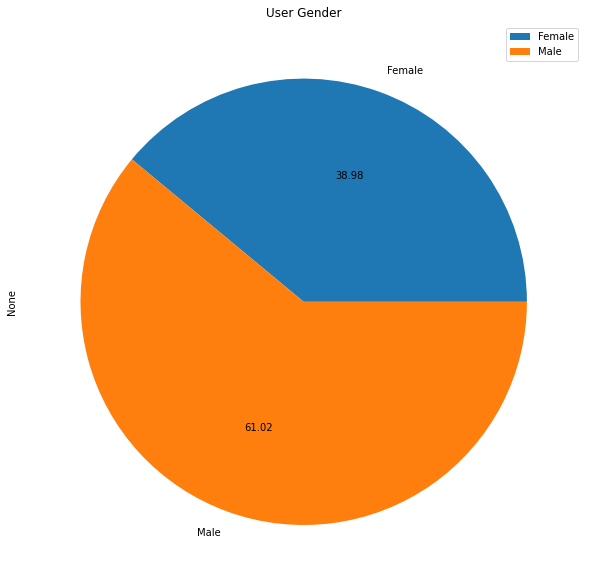

In [ ]:
#gender user
gender_count = df_eda_users.groupby('user_gender').size()
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(1, 1, 1)
gender_count.plot(kind='pie', autopct='%.2f') 
ax.legend(loc='best')
ax.title.set_text("User Gender")

In [ ]:
occ_count = df_eda_users.groupby('user_occupation').size()
occ_count.to_frame()
df_occ_count = pd.DataFrame(occ_count).reset_index()
df_occ_count.columns = ['user_occ', 'occ_count']
df_occ_count

,user_occ,occ_count
0,Guru,106
1,IRT,934
2,Others,1683
3,PNS,191
4,Pelajar,7887
5,Pengusaha,598
6,Pensiunan,5
7,Swasta,3263
8,TNI/Polisi,45


<AxesSubplot:xlabel='occ_count', ylabel='user_occ'>

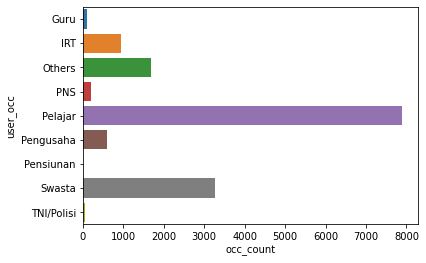

In [ ]:
import seaborn as sns 
sns.barplot(x='occ_count', y='user_occ', data=df_occ_count, orient='h', ci=None)

Insight:
*   There are 14.712 users in this data
*   Most registration_import_datetime = 2021-09-01 19:28:19
*   Most users_gender = Male (61.02%)
*   Most user_occupation = Pelajar
*   Most user_income_range = < 10 Juta
*   Most referral_code_used = unknown
*   Most user_income_source = Gaji

In [ ]:
df_object_transactions = df_eda_transactions.select_dtypes(exclude=['number'])
object = df_object_transactions.columns.to_list()
object

['user_id', 'date', 'outlier']

In [ ]:
df_eda_transactions[object].describe()

,user_id,date,outlier
count,137008,137008,137008
unique,7688,42,1
top,1062501,2021-09-30 00:00:00,Not Outlier
freq,42,7080,137008
first,NaN,2021-08-04 00:00:00,NaN
last,NaN,2021-09-30 00:00:00,NaN


Insight:
*   There are 8.277 unique users has done transactions withing the time range.
*   Most date = 2021-09-30 00:00:00

### Users in each mutual funds

In [ ]:
buy_s_users = df_eda[['user_id','saham_invested_amount']]
buy_s_users = buy_s_users[buy_s_users !=0]
buy_s_users = buy_s_users[~buy_s_users['saham_invested_amount'].isna()] #Exclude all null data
buy_s_users.nunique()

user_id                  4826
saham_invested_amount     452
dtype: int64

In [ ]:
buy_pu_users = df_eda[['user_id','pasar_uang_invested_amount']]
buy_pu_users = buy_pu_users[buy_pu_users !=0]
buy_pu_users = buy_pu_users[~buy_pu_users['pasar_uang_invested_amount'].isna()] #Exclude all null data
buy_pu_users.nunique()

user_id                       5887
pasar_uang_invested_amount     478
dtype: int64

In [ ]:
buy_pt_users = df_eda[['user_id','pendapatan_tetap_invested_amount']]
buy_pt_users = buy_pt_users[buy_pt_users !=0]
buy_pt_users = buy_pt_users[~buy_pt_users['pendapatan_tetap_invested_amount'].isna()] #Exclude all null data
buy_pt_users.nunique()

user_id                             4712
pendapatan_tetap_invested_amount     439
dtype: int64

In [ ]:
buy_c_users = df_eda[['user_id','campuran_invested_amount']]
buy_c_users = buy_c_users[buy_c_users !=0]
buy_c_users = buy_c_users[~buy_c_users['campuran_invested_amount'].isna()] #Exclude all null data
buy_c_users.nunique()

user_id                     94
campuran_invested_amount    16
dtype: int64

In [ ]:
# assign data of lists.  
user_m = {'mutual_fund': ['saham', 'pasar_uang', 'pendapatan_tetap', 'campuran'], 'unq_users': [4826, 5887, 4712, 94]}  
  
# Create DataFrame  
df_user_m = pd.DataFrame(user_m)  
  
# Print the output.  
df_user_m 

,mutual_fund,unq_users
0,saham,4826
1,pasar_uang,5887
2,pendapatan_tetap,4712
3,campuran,94


<AxesSubplot:xlabel='unq_users', ylabel='mutual_fund'>

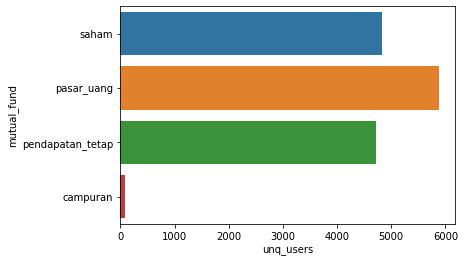

In [ ]:
sns.barplot(x='unq_users', y='mutual_fund', data=df_user_m, orient='h', ci=None)

Insight:
*   There are 4,862 users bought saham mutual fund.
*   There are 5,887 users bought pasar uang mutual fund.
*   There are 4,712 users bought pendapatan tetap mutual fund.
*   There are 94 users bought campuran mutual fund. 



## Finding Pattern

### Transaction Trend

#### Total Buy Transaction Amount

In [ ]:
total_buy = df_transactions[['date','total_buy_transaction_amount']]
total_buy = total_buy[total_buy !=0]
total_buy = total_buy[~total_buy['total_buy_transaction_amount'].isna()] #Exclude all null data
total_buy

,date,total_buy_transaction_amount
154,2021-09-29,140000.0
166,2021-09-20,1000000.0
234,2021-09-24,120613.0
274,2021-08-10,50000.0
278,2021-08-16,200000.0
...,...,...
158528,2021-09-30,20000.0
158548,2021-09-30,100000.0
158555,2021-09-30,10000.0
158566,2021-09-30,100000.0


In [ ]:
t_trend = total_buy[['date','total_buy_transaction_amount']]    #Choose the variable wee need to make the chart
t_trend['month'] = t_trend['date'].dt.strftime('%m')
t_trend['day'] = t_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
t_trend['day'] = t_trend['day'].astype(float)   #Change user_id data type into string
#Here we also decided to assign it into different column
#loc[row,column]
a = t_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
t_trend.loc[(a < 8), 'week']  = '-1'
t_trend.loc[(a >= 8), 'week']  = '-2'
t_trend.loc[(a >= 16), 'week']  = '-3'
t_trend.loc[(a >= 24), 'week']  = '-4'
t_trend.loc[(a >= 31), 'week']  = '-5'

t_trend['month_week']=t_trend['month']+t_trend['week']
t_trend_f = t_trend[['date','month_week','total_buy_transaction_amount']] 
t_trend_f.head(20)

,date,month_week,total_buy_transaction_amount
154,2021-09-29,09-4,140000.0
166,2021-09-20,09-3,1000000.0
234,2021-09-24,09-4,120613.0
274,2021-08-10,08-2,50000.0
278,2021-08-16,08-3,200000.0
281,2021-08-19,08-3,10500.0
474,2021-09-24,09-4,50000.0
481,2021-08-13,08-2,10000.0
482,2021-08-16,08-3,10000.0
572,2021-09-08,09-2,50000.0


In [ ]:
t_trend_f = t_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
t_trend_f = t_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
t_trend_f = t_trend_f.reset_index()

t_trend_f.head(20)

,month_week,total_buy_transaction_amount
0,08-1,78703.703704
1,08-2,108262.694915
2,08-3,126141.982143
3,08-4,134872.475472
4,08-5,129303.830189
5,09-1,144471.688667
6,09-2,132664.730585
7,09-3,130650.100000
8,09-4,138970.847992


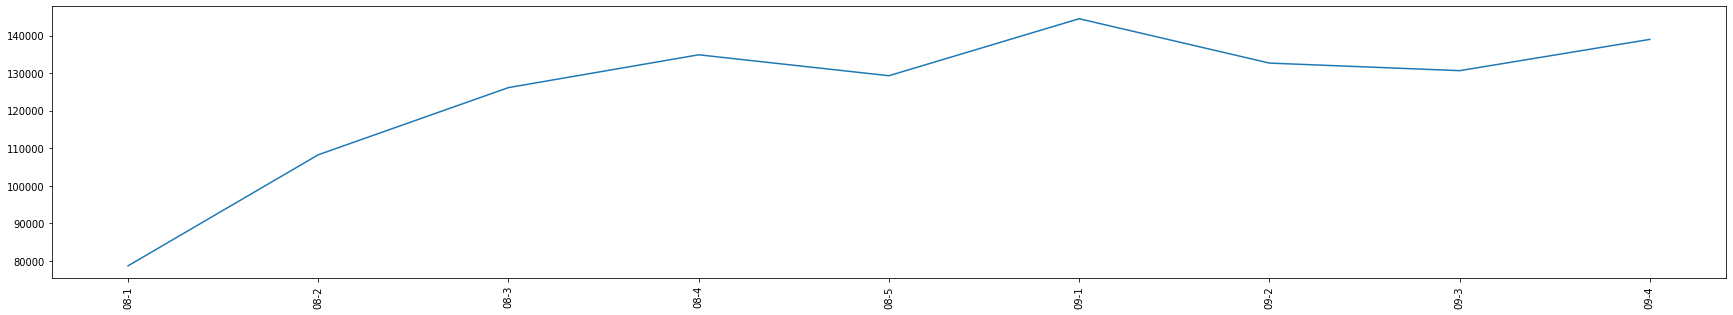

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(t_trend_f['month_week'], t_trend_f['total_buy_transaction_amount'])

plt.show()

#### Buy Transaction Each Products

In [ ]:
saham_buy = df_transactions[['date','buy_saham_transaction_amount']]
saham_buy = saham_buy[saham_buy !=0]
saham_buy = saham_buy[~saham_buy['buy_saham_transaction_amount'].isna()] #Exclude all null data

s_trend = saham_buy[['date','buy_saham_transaction_amount']]    #Choose the variable wee need to make the chart
s_trend['month'] = s_trend['date'].dt.strftime('%m')
s_trend['day'] = s_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
s_trend['day'] = s_trend['day'].astype(float)   #Change user_id data type into string

#Here we also decided to assign it into different column
#loc[row,column]
a = s_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
s_trend.loc[(a < 8), 'week']  = '-1'
s_trend.loc[(a >= 8), 'week']  = '-2'
s_trend.loc[(a >= 16), 'week']  = '-3'
s_trend.loc[(a >= 24), 'week']  = '-4'

s_trend['month_week']=s_trend['month']+s_trend['week']
s_trend_f = s_trend[['date','month_week','buy_saham_transaction_amount']] 


s_trend_f = s_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
s_trend_f = s_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
s_trend_f = s_trend_f.reset_index()
s_trend_f.head(20)

,month_week,buy_saham_transaction_amount
0,08-1,85000.000000
1,08-2,112962.851852
2,08-3,111380.475309
3,08-4,103752.131687
4,09-1,100004.815126
5,09-2,100569.724638
6,09-3,109146.253012
7,09-4,110285.556701


In [ ]:
pu_buy = df_transactions[['date','buy_pasar_uang_transaction_amount']]
pu_buy = pu_buy[pu_buy !=0]
pu_buy = pu_buy[~pu_buy['buy_pasar_uang_transaction_amount'].isna()] #Exclude all null data

pu_trend = pu_buy[['date','buy_pasar_uang_transaction_amount']]    #Choose the variable wee need to make the chart
pu_trend['month'] = pu_trend['date'].dt.strftime('%m')
pu_trend['day'] = pu_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
pu_trend['day'] = pu_trend['day'].astype(float)   #Change user_id data type into string

#Here we also decided to assign it into different column
#loc[row,column]
a = pu_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
pu_trend.loc[(a < 8), 'week']  = '-1'
pu_trend.loc[(a >= 8), 'week']  = '-2'
pu_trend.loc[(a >= 16), 'week']  = '-3'
pu_trend.loc[(a >= 24), 'week']  = '-4'

pu_trend['month_week']=pu_trend['month']+pu_trend['week']
pu_trend_f = pu_trend[['date','month_week','buy_pasar_uang_transaction_amount']] 

pu_trend_f = pu_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
pu_trend_f = pu_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
pu_trend_f = pu_trend_f.reset_index()
pu_trend_f.head(20)

,month_week,buy_pasar_uang_transaction_amount
0,08-1,27187.500000
1,08-2,66604.978947
2,08-3,87084.931915
3,08-4,95777.755618
4,09-1,81877.100000
5,09-2,79488.512777
6,09-3,84496.876636
7,09-4,80889.672241


In [ ]:
pt_buy = df_transactions[['date','buy_pasar_uang_transaction_amount']]
pt_buy = pt_buy[pt_buy !=0]
pt_buy = pt_buy[~pt_buy['buy_pasar_uang_transaction_amount'].isna()] #Exclude all null data

pt_trend = pt_buy[['date','buy_pasar_uang_transaction_amount']]    #Choose the variable wee need to make the chart
pt_trend['month'] = pt_trend['date'].dt.strftime('%m')
pt_trend['day'] = pt_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
pt_trend['day'] = pt_trend['day'].astype(float)   #Change user_id data type into string

#Here we also decided to assign it into different column
#loc[row,column]
a = pt_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
pt_trend.loc[(a < 8), 'week']  = '-1'
pt_trend.loc[(a >= 8), 'week']  = '-2'
pt_trend.loc[(a >= 16), 'week']  = '-3'
pt_trend.loc[(a >= 24), 'week']  = '-4'

pt_trend['month_week']=pt_trend['month']+pt_trend['week']
pt_trend_f = pt_trend[['date','month_week','buy_pasar_uang_transaction_amount']] 

pt_trend_f = pt_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
pt_trend_f = pt_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
pt_trend_f = pt_trend_f.reset_index()
pt_trend_f.head(20)

,month_week,buy_pasar_uang_transaction_amount
0,08-1,27187.500000
1,08-2,66604.978947
2,08-3,87084.931915
3,08-4,95777.755618
4,09-1,81877.100000
5,09-2,79488.512777
6,09-3,84496.876636
7,09-4,80889.672241


In [ ]:
pt_buy = df_transactions[['date','buy_pendapatan_tetap_transaction_amount']]
pt_buy = pt_buy[pt_buy !=0]
pt_buy = pt_buy[~pt_buy['buy_pendapatan_tetap_transaction_amount'].isna()] #Exclude all null data

pt_trend = pt_buy[['date','buy_pendapatan_tetap_transaction_amount']]    #Choose the variable wee need to make the chart
pt_trend['month'] = pt_trend['date'].dt.strftime('%m')
pt_trend['day'] = pt_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
pt_trend['day'] = pt_trend['day'].astype(float)   #Change user_id data type into string

#Here we also decided to assign it into different column
#loc[row,column]
a = pt_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
pt_trend.loc[(a < 8), 'week']  = '-1'
pt_trend.loc[(a >= 8), 'week']  = '-2'
pt_trend.loc[(a >= 16), 'week']  = '-3'
pt_trend.loc[(a >= 24), 'week']  = '-4'

pt_trend['month_week']=pt_trend['month']+pt_trend['week']
pt_trend_f = pt_trend[['date','month_week','buy_pendapatan_tetap_transaction_amount']] 

pt_trend_f = pt_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
pt_trend_f = pt_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
pt_trend_f = pt_trend_f.reset_index()
pt_trend_f.head(20)

,month_week,buy_pendapatan_tetap_transaction_amount
0,08-1,59411.764706
1,08-2,77658.607595
2,08-3,72963.163934
3,08-4,78532.015291
4,09-1,95266.689498
5,09-2,80139.812030
6,09-3,79203.251656
7,09-4,91197.426752


In [ ]:
c_buy = df_transactions[['date','buy_campuran_transaction_amount']]
c_buy = c_buy[c_buy !=0]
c_buy = c_buy[~c_buy['buy_campuran_transaction_amount'].isna()] #Exclude all null data

c_trend = c_buy[['date','buy_campuran_transaction_amount']]    #Choose the variable wee need to make the chart
c_trend['month'] = c_trend['date'].dt.strftime('%m')
c_trend['day'] = c_trend['date'].dt.strftime('%d')   #Change the date into year,month format to get weekly data
c_trend['day'] = c_trend['day'].astype(float)   #Change user_id data type into string

#Here we also decided to assign it into different column
#loc[row,column]
a = c_trend['day']   #To make it easier to assign the data into the bin / category we assign the column into a variable
c_trend.loc[(a < 8), 'week']  = '-1'
c_trend.loc[(a >= 8), 'week']  = '-2'
c_trend.loc[(a >= 16), 'week']  = '-3'
c_trend.loc[(a >= 24), 'week']  = '-4'

c_trend['month_week']=pt_trend['month']+pt_trend['week']
c_trend_f = c_trend[['date','month_week','buy_campuran_transaction_amount']] 

c_trend_f = c_trend_f.sort_values('month_week')  #Sort the values by the date, ascending
c_trend_f = c_trend_f.groupby('month_week').mean() #mean the data and group it by the month_week
c_trend_f = c_trend_f.reset_index()
c_trend_f.head(20)

,month_week,buy_campuran_transaction_amount
0,08-3,100000.0
1,09-2,200000.0
2,09-3,100000.0


In [ ]:
s_pu = s_trend_f.merge(pu_trend_f,how='left',left_on='month_week', right_on='month_week')
s_pu_pt = s_pu.merge(pt_trend_f,how='left',left_on='month_week', right_on='month_week')
all_trend = s_pu_pt.merge(c_trend_f,how='left',left_on='month_week', right_on='month_week')
all_trend.buy_saham_transaction_amount = all_trend.buy_saham_transaction_amount.round(2)
all_trend.buy_pasar_uang_transaction_amount = all_trend.buy_pasar_uang_transaction_amount .round(2)
all_trend.buy_pendapatan_tetap_transaction_amount = all_trend.buy_pendapatan_tetap_transaction_amount.round(2)
all_trend.buy_campuran_transaction_amount = all_trend.buy_campuran_transaction_amount.round(2)
all_trend

,month_week,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
0,08-1,85000.00,27187.50,59411.76,NaN
1,08-2,112962.85,66604.98,77658.61,NaN
2,08-3,111380.48,87084.93,72963.16,100000.0
3,08-4,103752.13,95777.76,78532.02,NaN
4,09-1,100004.82,81877.10,95266.69,NaN
5,09-2,100569.72,79488.51,80139.81,200000.0
6,09-3,109146.25,84496.88,79203.25,100000.0
7,09-4,110285.56,80889.67,91197.43,NaN


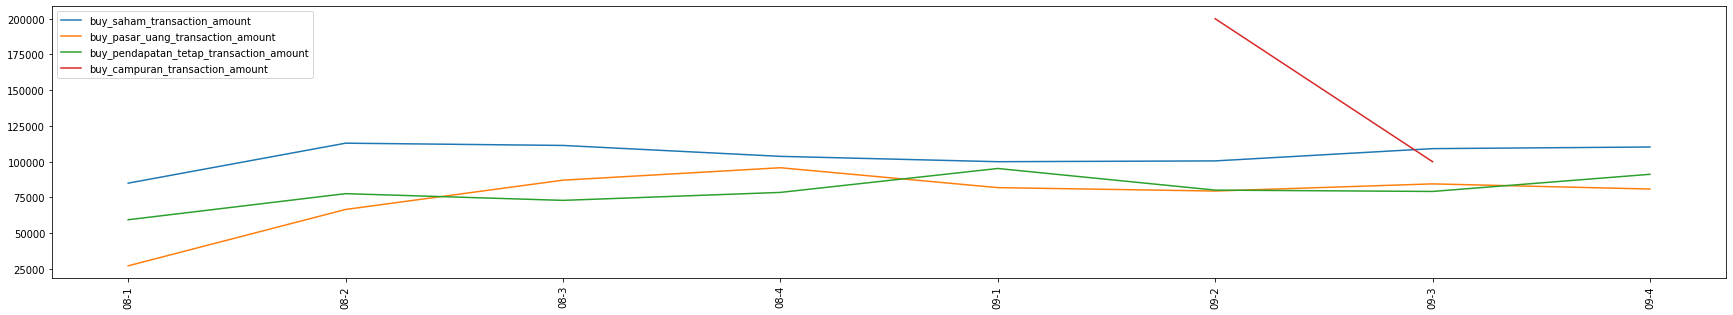

In [ ]:
fig = plt.figure(figsize = (30,5))
axis = all_trend[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']]
x = all_trend['month_week']
y = all_trend[1:]

for x in axis[1:]:
  plt.plot(all_trend['month_week'], all_trend[x])

plt.xticks(rotation = 90)
plt.legend(all_trend[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']],loc = 2)

plt.show()

Insight:
*   All product has positive trend.
*   The highest trend to lowest trend are: pendapatan tetap, pasar uang, saham, then campuran.



#### Transactions Based on Age Range

In [ ]:
t_age = df_eda[['user_age_rg','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']]    #Choose the variable wee need to make the chart

t_age = t_age.sort_values('user_age_rg')  #Sort the values by the date, ascending
t_age = t_age.groupby('user_age_rg').mean() #mean the data and group it by the user age
t_age = t_age.reset_index()
#t_age.saham_invested_amount = t_age.saham_invested_amount.round(2)
#t_age.pasar_uang_invested_amount = t_age.pasar_uang_invested_amount.round(2)
#t_age.pendapatan_tetap_invested_amount = t_age.pendapatan_tetap_invested_amount.round(2)
#t_age.campuran_invested_amount = t_age.campuran_invested_amount.round(2)
#t_age.total_invested_amount = t_age.total_invested_amount.round(2)
t_age.head(10)

,user_age_rg,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,18-24,50790.660828,57150.591464,50810.554558,3666.976478
1,25-34,81044.042425,60302.416993,81390.246727,7518.261381
2,35-44,99050.233166,56122.825300,89694.106384,8326.348142
3,45-54,97687.265539,59149.302133,119420.755425,10518.389114
4,55-64,55118.505967,95972.733890,83629.227924,2386.634845
5,65 and above,15102.040816,34489.795918,27551.020408,0.000000
6,Under 18,49070.977251,45758.695547,45255.505808,3339.787028


In [ ]:
t_age.set_index('user_age_rg',inplace=True)
t_age

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
user_age_rg,,,,
18-24,50790.660828,57150.591464,50810.554558,3666.976478
25-34,81044.042425,60302.416993,81390.246727,7518.261381
35-44,99050.233166,56122.825300,89694.106384,8326.348142
45-54,97687.265539,59149.302133,119420.755425,10518.389114
55-64,55118.505967,95972.733890,83629.227924,2386.634845
65 and above,15102.040816,34489.795918,27551.020408,0.000000
Under 18,49070.977251,45758.695547,45255.505808,3339.787028


<AxesSubplot:xlabel='user_age_rg'>

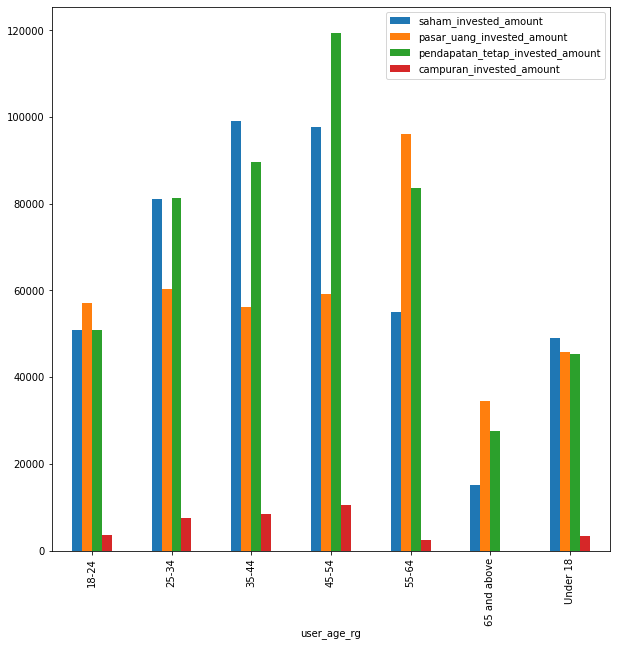

In [ ]:
t_age.plot(kind="bar", figsize = (10, 10))

#### Transaction Based on Occupation

In [ ]:
t_occ = df_eda[['user_occupation','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']]    #Choose the variable wee need to make the chart

t_occ = t_occ.sort_values('user_occupation')  #Sort the values by the date, ascending
t_occ = t_occ.groupby('user_occupation').mean() #mean the data and group it by the user occupation
t_occ = t_occ.reset_index()
#t_occ.saham_invested_amount = t_age.saham_invested_amount.round(2)
#t_occ.pasar_uang_invested_amount = t_age.pasar_uang_invested_amount.round(2)
#t_occ.pendapatan_tetap_invested_amount = t_age.pendapatan_tetap_invested_amount.round(2)
#t_occ.campuran_invested_amount = t_age.campuran_invested_amount.round(2)
#t_occ.total_invested_amount = t_age.total_invested_amount.round(2)
t_occ.head(10)

,user_occupation,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,Guru,105216.607767,75228.275728,105674.440777,1359.223301
1,IRT,54942.288814,44629.790275,62693.661794,4893.060471
2,Others,56449.927066,41894.000145,49399.541682,7843.847324
3,PNS,124503.044011,92608.328134,125393.800557,4679.665738
4,Pelajar,61075.932226,62320.486051,61760.610164,5037.000618
5,Pengusaha,64643.333046,43654.999139,56777.041765,18148.546825
6,Pensiunan,27906.976744,146976.744186,150697.674419,0.000000
7,Swasta,87913.318712,56911.913088,89132.237852,4775.714917
8,TNI/Polisi,77725.207877,69377.901532,89525.531729,0.000000


In [ ]:
t_occ.set_index('user_occupation',inplace=True)
t_occ

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
user_occupation,,,,
Guru,105216.607767,75228.275728,105674.440777,1359.223301
IRT,54942.288814,44629.790275,62693.661794,4893.060471
Others,56449.927066,41894.000145,49399.541682,7843.847324
PNS,124503.044011,92608.328134,125393.800557,4679.665738
Pelajar,61075.932226,62320.486051,61760.610164,5037.000618
Pengusaha,64643.333046,43654.999139,56777.041765,18148.546825
Pensiunan,27906.976744,146976.744186,150697.674419,0.000000
Swasta,87913.318712,56911.913088,89132.237852,4775.714917
TNI/Polisi,77725.207877,69377.901532,89525.531729,0.000000


<AxesSubplot:xlabel='user_occupation'>

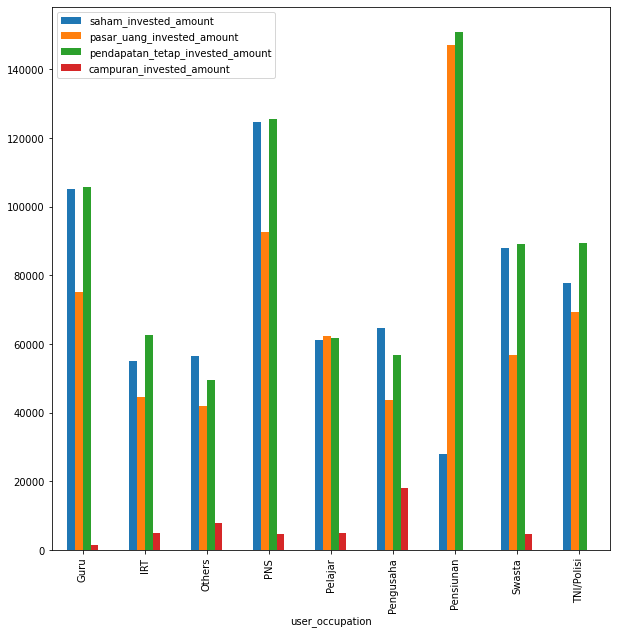

In [ ]:
t_occ.plot(kind="bar", figsize = (10, 10))

# E) Segmentation

## Data Preparation

In [ ]:
#Make a copy of the clean data for segmentation
df_segm = df_merged_clean.copy()
df_segm = df_segm.sort_values('user_age')  #Sort the values by the date, ascending
df_segm = df_segm.groupby('user_id').mean() #mean the data and group it by the user occupation
df_segm = df_segm.reset_index()
df_segm
df_segmentation = df_segm.merge(df_users[["user_id", "registration_import_datetime", "user_gender","registration_import_datetime", 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source','user_age_rg']])
df_segmentation

,user_id,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,registration_import_datetime,user_gender,registration_import_datetime,user_occupation,user_income_range,referral_code_used,user_income_source,user_age_rg
0,1004326,30.0,200000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,90000.000000,20000.000000,90000.000000,0.0,200000.000000,2021-08-13 14:56:59,Female,2021-08-13 14:56:59,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
1,1005053,31.0,200000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,150000.000000,10000.000000,40000.000000,0.0,200000.000000,2021-09-20 11:37:30,Male,2021-09-20 11:37:30,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
2,1005165,22.0,100000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,10000.000000,20000.000000,70000.000000,0.0,100000.000000,2021-08-24 17:22:37,Female,2021-08-24 17:22:37,Pelajar,< 10 Juta,no referral,Undian,18-24
3,1018814,20.0,0.0,0.0,-1300000.0,0.000000,0.0,0.000000,-325000.0,0.000000,0.0,0.0,0.0,0.000000,-325000.0,0.000000,0.000000,0.000000,0.0,0.000000,2021-08-25 21:06:53,Male,2021-08-25 21:06:53,Others,< 10 Juta,no referral,Undian,18-24
4,1023627,33.0,100000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,100000.000000,0.000000,0.000000,0.0,100000.000000,2021-08-10 11:48:46,Male,2021-08-10 11:48:46,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,988940,27.0,500000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,50000.000000,290000.000000,160000.000000,0.0,500000.000000,2021-09-01 10:27:25,Male,2021-09-01 10:27:25,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,25-34
7684,989618,29.0,3000000.0,2000000.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,470000.000000,100000.000000,430000.000000,0.0,1000000.000000,2021-08-18 11:32:25,Male,2021-08-18 11:32:25,Pelajar,< 10 Juta,no referral,Gaji,25-34
7685,990466,33.0,2000000.0,1500000.0,0.0,5000.000000,0.0,2272.727273,0.0,15454.545455,0.0,0.0,0.0,22727.272727,0.0,360000.000000,95454.545455,499090.909091,0.0,954545.454545,2021-08-26 11:34:23,Male,2021-08-26 11:34:23,Swasta,< 10 Juta,no referral,Gaji,25-34
7686,99245,25.0,1000000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,500000.000000,500000.000000,0.0,1000000.000000,2021-09-09 20:20:43,Male,2021-09-09 20:20:43,Pelajar,< 10 Juta,no referral,Gaji,25-34


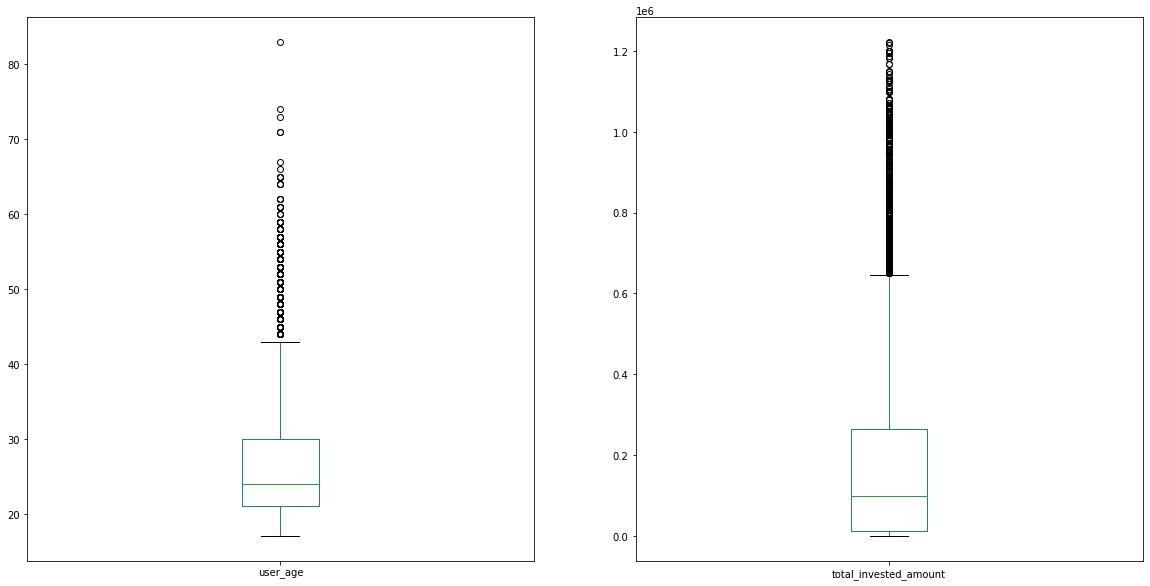

In [ ]:
# filter numeric column
feature = ['user_age', 'total_invested_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Age (el)
for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

## Library

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

## Preparing user age and total invested amount

In [ ]:
df_segmentation_feature = df_segmentation[['user_id','user_age', 'total_invested_amount']]
df_segmentation_feature

,user_id,user_age,total_invested_amount
0,1004326,30.0,200000.000000
1,1005053,31.0,200000.000000
2,1005165,22.0,100000.000000
3,1018814,20.0,0.000000
4,1023627,33.0,100000.000000
...,...,...,...
7683,988940,27.0,500000.000000
7684,989618,29.0,1000000.000000
7685,990466,33.0,954545.454545
7686,99245,25.0,1000000.000000


## Check Data Distribution

### No Scale

<AxesSubplot:xlabel='user_age', ylabel='total_invested_amount'>

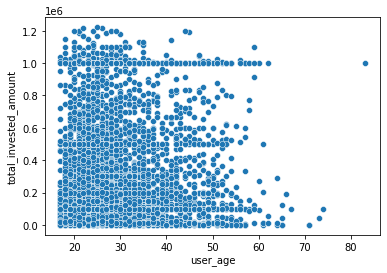

In [ ]:
sns.scatterplot(data = df_segmentation_feature, x='user_age', y='total_invested_amount')

### Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['user_age','total_invested_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<AxesSubplot:xlabel='user_age', ylabel='total_invested_amount'>

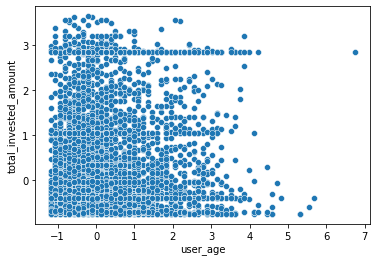

In [ ]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='total_invested_amount')

### Robus Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age', 'total_invested_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age', 'total_invested_amount']])

<AxesSubplot:xlabel='user_age', ylabel='total_invested_amount'>

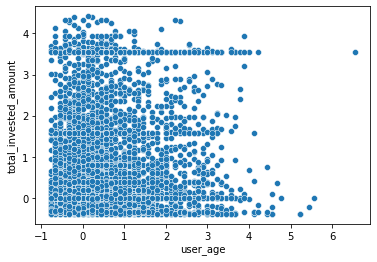

In [ ]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='total_invested_amount')

### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['user_age', 'total_invested_amount']] = mm_scaler.fit_transform(mm_scale_df[['user_age', 'total_invested_amount']])

<AxesSubplot:xlabel='user_age', ylabel='total_invested_amount'>

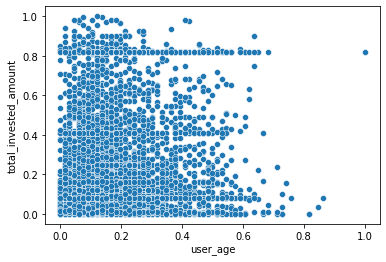

In [ ]:
sns.scatterplot (data = mm_scale_df, x='user_age', y='total_invested_amount')

## Cluster

### Elbow Method

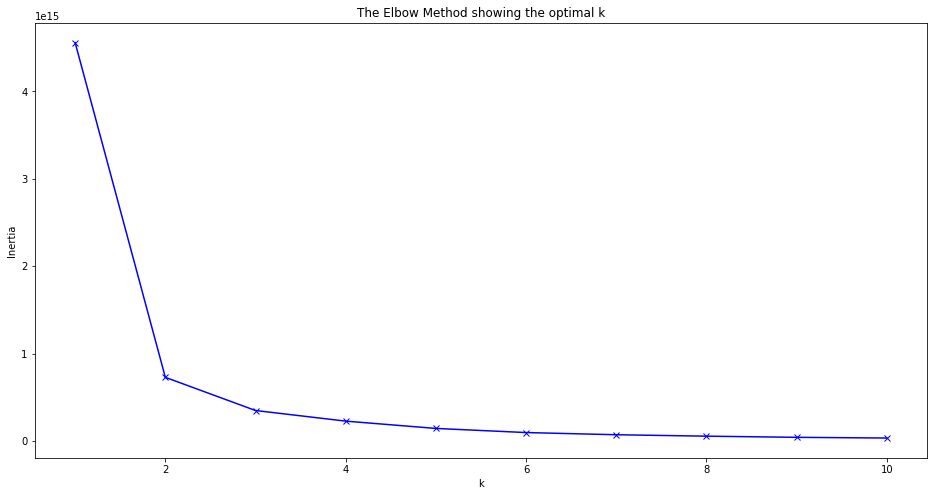

[4555038530646687.0, 729205692707756.1, 350055258254864.4, 228646981626283.44, 145128955579438.0, 97990948060461.62, 73045299988188.34, 56663799638663.086, 43541083707275.72, 35379586910604.82]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5249961068771347
For n_clusters = 3 The average silhouette_score is : 0.5557844373725187
For n_clusters = 4 The average silhouette_score is : 0.45286046516281947


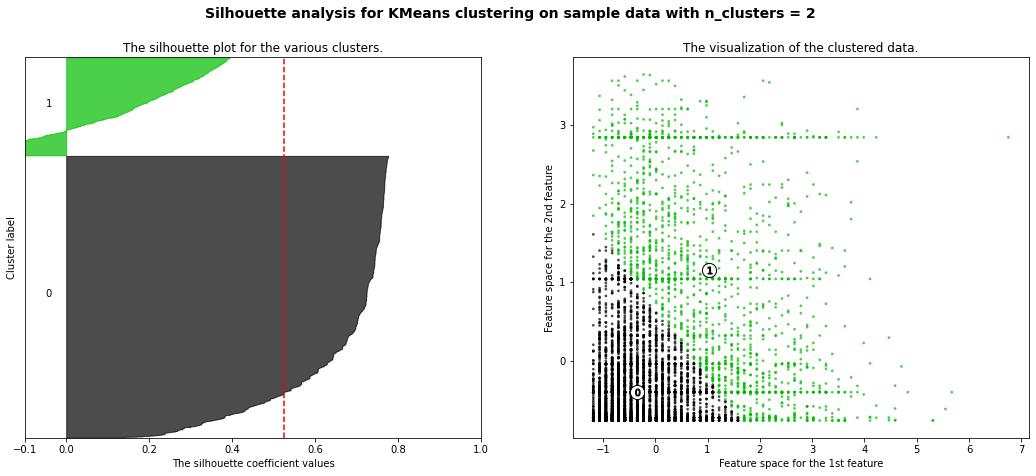

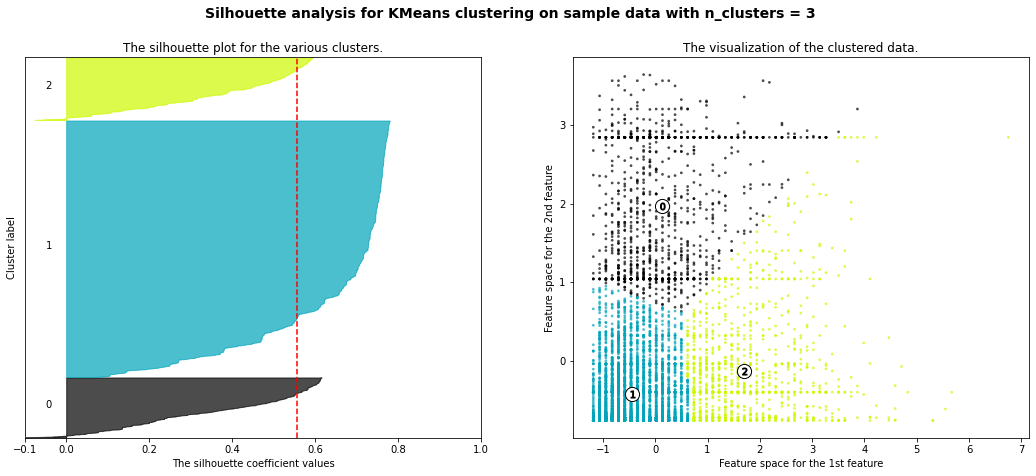

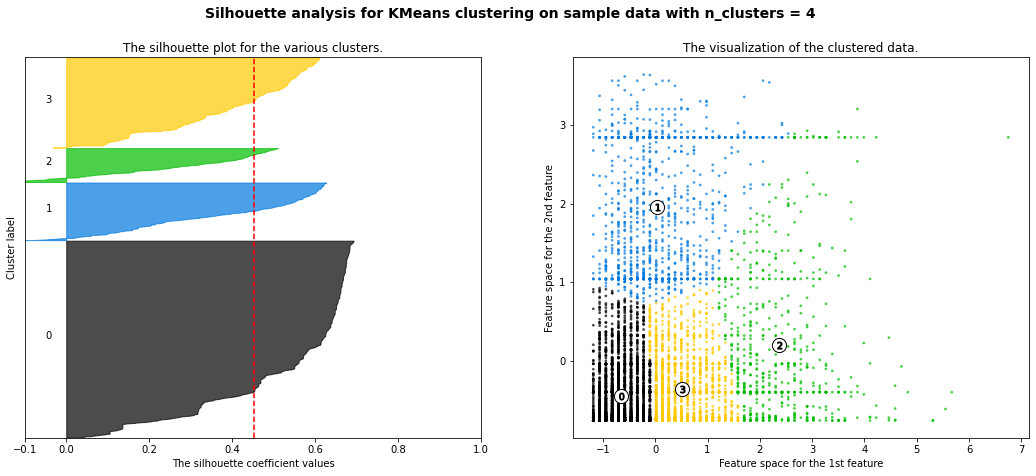

In [ ]:
silhoutte_analysis(ss_scale_df[['user_age', 'total_invested_amount']],list(range(2,5)))                   #------Tinggal ganti di variablenya dan rangenya

## Segmentation

In [ ]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_3[['user_age', 'total_invested_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

,user_id,user_age,total_invested_amount,cluster
0,1004326,0.379150,-0.041113,1
1,1005053,0.499397,-0.041113,1
2,1005165,-0.582825,-0.401631,1
3,1018814,-0.823319,-0.762148,1
4,1023627,0.739891,-0.401631,2


<AxesSubplot:xlabel='cluster', ylabel='user_age'>

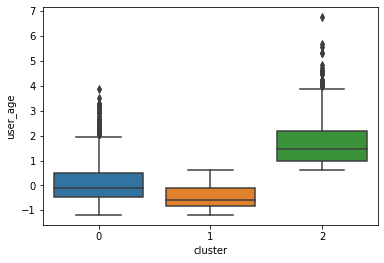

In [ ]:
# Number of Age
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='user_age')

<AxesSubplot:xlabel='cluster', ylabel='total_invested_amount'>

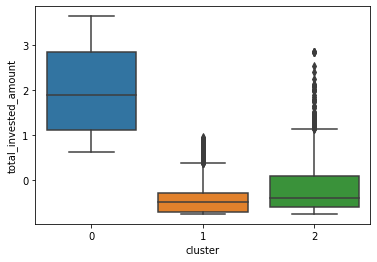

In [ ]:
# Invested Amount
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='total_invested_amount')

In [ ]:
# make cluster
Cluster_2 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=2)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_2[['user_age', 'total_invested_amount']])
Cluster_2['cluster'] = cluster_model.labels_
Cluster_2.head()

,user_id,user_age,total_invested_amount,cluster
0,1004326,0.379150,-0.041113,1
1,1005053,0.499397,-0.041113,1
2,1005165,-0.582825,-0.401631,1
3,1018814,-0.823319,-0.762148,1
4,1023627,0.739891,-0.401631,1


<AxesSubplot:xlabel='cluster', ylabel='user_age'>

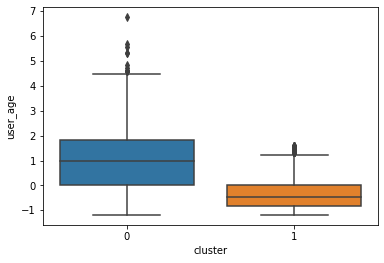

In [ ]:
# Number of Age
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='user_age')

<AxesSubplot:xlabel='cluster', ylabel='total_invested_amount'>

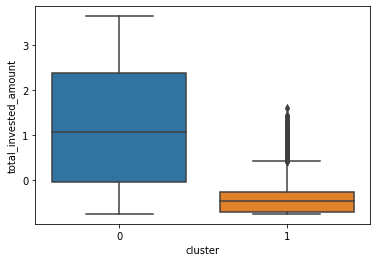

In [ ]:
# Invested Amount
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='total_invested_amount')

## Merge Cluster with Dataset

In [ ]:
df_segmented = Cluster_3.merge(df_segmentation,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,total_invested_amount_x,cluster,user_age_y,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y,registration_import_datetime,user_gender,registration_import_datetime,user_occupation,user_income_range,referral_code_used,user_income_source,user_age_rg
0,1004326,0.379150,-0.041113,1,30.0,200000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,90000.000000,20000.000000,90000.000000,0.0,200000.000000,2021-08-13 14:56:59,Female,2021-08-13 14:56:59,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
1,1005053,0.499397,-0.041113,1,31.0,200000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,150000.000000,10000.000000,40000.000000,0.0,200000.000000,2021-09-20 11:37:30,Male,2021-09-20 11:37:30,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
2,1005165,-0.582825,-0.401631,1,22.0,100000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,10000.000000,20000.000000,70000.000000,0.0,100000.000000,2021-08-24 17:22:37,Female,2021-08-24 17:22:37,Pelajar,< 10 Juta,no referral,Undian,18-24
3,1018814,-0.823319,-0.762148,1,20.0,0.0,0.0,-1300000.0,0.000000,0.0,0.000000,-325000.0,0.000000,0.0,0.0,0.0,0.000000,-325000.0,0.000000,0.000000,0.000000,0.0,0.000000,2021-08-25 21:06:53,Male,2021-08-25 21:06:53,Others,< 10 Juta,no referral,Undian,18-24
4,1023627,0.739891,-0.401631,2,33.0,100000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,100000.000000,0.000000,0.000000,0.0,100000.000000,2021-08-10 11:48:46,Male,2021-08-10 11:48:46,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,988940,0.018409,1.040439,0,27.0,500000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,50000.000000,290000.000000,160000.000000,0.0,500000.000000,2021-09-01 10:27:25,Male,2021-09-01 10:27:25,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,25-34
7684,989618,0.258903,2.843025,0,29.0,3000000.0,2000000.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,470000.000000,100000.000000,430000.000000,0.0,1000000.000000,2021-08-18 11:32:25,Male,2021-08-18 11:32:25,Pelajar,< 10 Juta,no referral,Gaji,25-34
7685,990466,0.739891,2.679154,0,33.0,2000000.0,1500000.0,0.0,5000.000000,0.0,2272.727273,0.0,15454.545455,0.0,0.0,0.0,22727.272727,0.0,360000.000000,95454.545455,499090.909091,0.0,954545.454545,2021-08-26 11:34:23,Male,2021-08-26 11:34:23,Swasta,< 10 Juta,no referral,Gaji,25-34
7686,99245,-0.222084,2.843025,0,25.0,1000000.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,500000.000000,500000.000000,0.0,1000000.000000,2021-09-09 20:20:43,Male,2021-09-09 20:20:43,Pelajar,< 10 Juta,no referral,Gaji,25-34


## Visualize Cluster

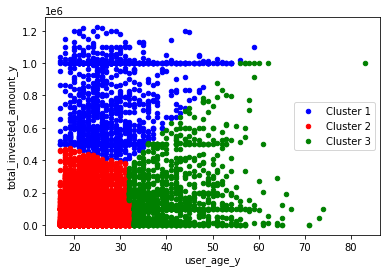

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)

## Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','total_invested_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                    0              1              2
user_age_y              count   1.216000e+03    5208.000000     1264.00000
                        mean    2.786595e+01      23.178955       40.97943
                        min     1.700000e+01      17.000000       32.00000
                        max     5.900000e+01      32.000000       83.00000
                        median  2.600000e+01      22.000000       39.00000
total_invested_amount_y count   1.216000e+03    5208.000000     1264.00000
                        mean    7.574953e+05   92610.185552   175510.86439
                        min     3.857143e+05       0.000000        0.00000
                        max     1.221667e+06  474242.424242  1000000.00000
                        median  7.340199e+05   72644.144144   100000.00000

### Cluster Interpretation

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,total_invested_amount_x,cluster,user_age_y,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y,registration_import_datetime,user_gender,registration_import_datetime,user_occupation,user_income_range,referral_code_used,user_income_source,user_age_rg
0,1004326,0.379150,-0.041113,1,30.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,20000.0,90000.0,0.0,200000.0,2021-08-13 14:56:59,Female,2021-08-13 14:56:59,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
1,1005053,0.499397,-0.041113,1,31.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0,10000.0,40000.0,0.0,200000.0,2021-09-20 11:37:30,Male,2021-09-20 11:37:30,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,25-34
2,1005165,-0.582825,-0.401631,1,22.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,20000.0,70000.0,0.0,100000.0,2021-08-24 17:22:37,Female,2021-08-24 17:22:37,Pelajar,< 10 Juta,no referral,Undian,18-24
3,1018814,-0.823319,-0.762148,1,20.0,0.0,0.0,-1300000.0,0.0,0.0,0.0,-325000.0,0.0,0.0,0.0,0.0,0.0,-325000.0,0.0,0.0,0.0,0.0,0.0,2021-08-25 21:06:53,Male,2021-08-25 21:06:53,Others,< 10 Juta,no referral,Undian,18-24
4,1023627,0.739891,-0.401631,2,33.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,100000.0,2021-08-10 11:48:46,Male,2021-08-10 11:48:46,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,25-34


In [ ]:
df_s_a = df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()
#df_s_a ['cluster'] = df_s_a['cluster'].astype(str) 
#df_s_a['a']=df_s_a['cluster']+"-"+df_s_a['user_gender']
#df_s_a.set_index('a',inplace=True)
#df_s_a.set_index('cluster',inplace=True)
df_s_a

,cluster,user_gender,user_id
0,0,Female,541
1,0,Male,675
2,1,Female,1776
3,1,Male,3432
4,2,Female,495
5,2,Male,769


In [ ]:
#df_s_a.plot(kind="bar", figsize = (10, 10))

In [ ]:
df_s_b = df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()
#df_s_b ['cluster'] = df_s_b['cluster'].astype(str) 
#df_s_b['a']=df_s_b['cluster']+"-"+df_s_b['user_occupation']
#df_s_b.set_index('a',inplace=True)
#df_s_b.set_index('cluster',inplace=True)
df_s_b

,cluster,user_occupation,user_id
0,0,Guru,12
1,0,IRT,47
2,0,Others,96
3,0,PNS,31
4,0,Pelajar,662
5,0,Pengusaha,36
6,0,Swasta,327
7,0,TNI/Polisi,5
8,1,Guru,26
9,1,IRT,177


In [ ]:
#df_s_b.plot(kind="bar", figsize = (10, 10))

In [ ]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count()

,cluster,user_income_range,user_id
0,0,< 10 Juta,329
1,0,> Rp 1 Miliar,6
2,0,> Rp 100 Juta - 500 Juta,162
3,0,> Rp 50 Juta - 100 Juta,300
4,0,> Rp 500 Juta - 1 Miliar,13
5,0,Rp 10 Juta - 50 Juta,406
6,1,< 10 Juta,2835
7,1,> Rp 1 Miliar,4
8,1,> Rp 100 Juta - 500 Juta,114
9,1,> Rp 50 Juta - 100 Juta,571


In [ ]:
df_segmented.groupby(['cluster','referral_code_used'], as_index = False)['user_id'].count()

,cluster,referral_code_used,user_id
0,0,no referral,875
1,0,used referral,341
2,1,no referral,3184
3,1,used referral,2024
4,2,no referral,882
5,2,used referral,382


In [ ]:
df_segmented.groupby(['cluster','user_income_source'], as_index = False)['user_id'].count()

,cluster,user_income_source,user_id
0,0,Bunga Simpanan,2
1,0,Dari Orang Tua / Anak,71
2,0,Dari Suami / istri,10
3,0,Gaji,863
4,0,Hasil Investasi,7
5,0,Keuntungan Bisnis,111
6,0,Lainnya,27
7,0,Tabungan,28
8,0,Undian,96
9,0,Warisan,1
